# Data Analysis

### Load and pre-process data

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

%run Data\ load.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4498 entries, 0 to 4586
Data columns (total 53 columns):
tender_num                        4498 non-null int64
deal_date                         4498 non-null datetime64[ns]
report_date                       4498 non-null datetime64[ns]
period                            4498 non-null int64
credit_amount                     4498 non-null float64
return_amount                     4498 non-null float64
rate                              4498 non-null float64
outstanding                       4498 non-null float64
return_date                       4498 non-null datetime64[ns]
expiration_date                   4498 non-null datetime64[ns]
tender_credit_amount              4498 non-null float64
tender_return_amount              4498 non-null float64
tender_interest_rate              4498 non-null float64
credit_amount_average             4498 non-null float64
credit_amount_to_average_ratio    4498 non-null float64
average_repeated_loan_count  

Imports

In [58]:
# from pylab import *
import numpy as np
# import matplotlib as plt
import pylab as plt
import seaborn as sns

Let's add columns for delinquency groups: <0, 0-30, 30-60, 60-90, 90-120, 120-150, 150-180, >180 days

In [59]:
def delinq_bracket(row):
   if row['delinq'] <= 0:
      return 0
   if row['delinq'] > 0 and row['delinq'] <= 30:
      return 30
   if row['delinq'] > 30 and row['delinq'] <= 60:
      return 60
   if row['delinq'] > 60 and row['delinq'] <= 90:
      return 90
   if row['delinq'] > 90 and row['delinq'] <= 120:
      return 120
   if row['delinq'] > 120 and row['delinq'] <= 150:
      return 150
   if row['delinq'] > 150 and row['delinq'] <= 180:
      return 180
   if row['delinq'] > 180 and row['delinq'] <= 210:
      return 210
   if row['delinq'] > 210 and row['delinq'] <= 240:
      return 240
   if row['delinq'] > 240 and row['delinq'] <= 270:
      return 270
   if row['delinq'] > 270 and row['delinq'] <= 300:
      return 300
   if row['delinq'] > 300 and row['delinq'] <= 330:
      return 330
   if row['delinq'] > 330 and row['delinq'] <= 360:
      return 360
   return 400

deals['delinq_bracket'] = deals.apply(lambda row: delinq_bracket(row), axis=1)
# deals[['delinq', 'delinq_bracket']].head()

Let's extract year and month from the datetime columns

In [66]:
not_important_columns = date_columns + [
    'wmid', 
    'tender_num', 

    'report_date_month',
    'report_date_year',
    
    'purpose',
    'address',
    'guarantee',
    'recommend',
    
    'rating', 
    'model',
    
    'reg_country',
    'reg_city',
    
    'give'
]

feature_columns = list(set(deals.columns) - set(not_important_columns))
for c in feature_columns:
    print(c)
print('')
print(len(feature_columns))

return_date_month
credit_amount_to_average_ratio
tender_return_amount
return_amount_rate
loan_count_total
credit_amount
purpose_code
creditors_count
reg_city_code
credit_amount_total
credit_count_total
outstanding
purpose_category
expiration_date_month
deal_date_month
return_rate
loan_count
rate
tender_credit_amount
period
return_amount
delinq
return_date_year
deal_date_year
pass_date_month
delinq_bracket
reg_country_id
expiration_date_year
business_level
pass_date_year
debt
empty_info
tender_interest_rate
average_repeated_loan_count
score
credit_amount_average

36


### Distributions

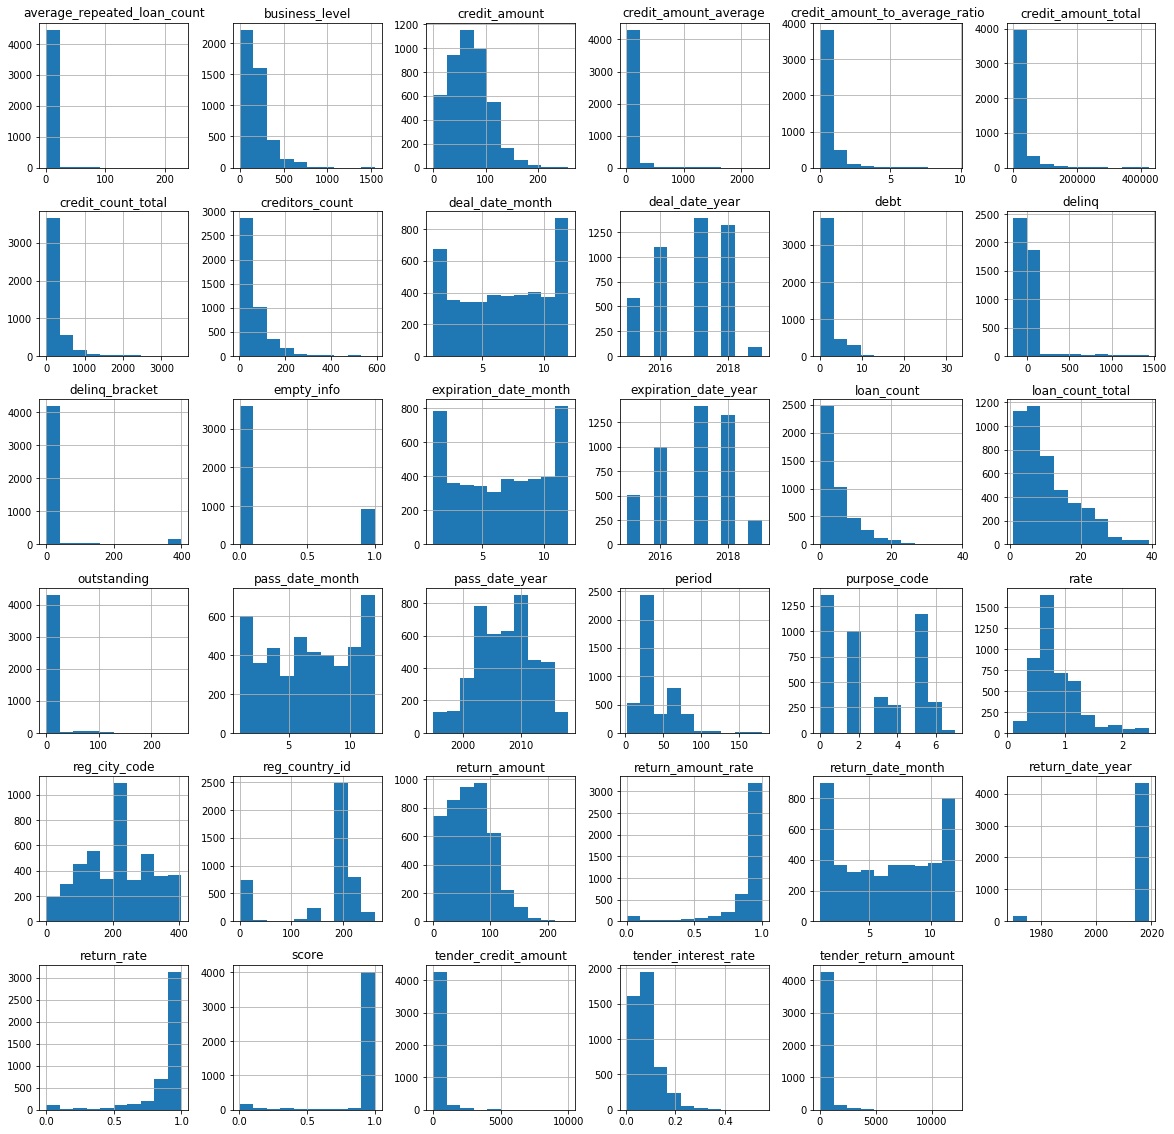

In [68]:
deals[feature_columns].hist(figsize=(20,20));

#### Business level dependency from total credit amount

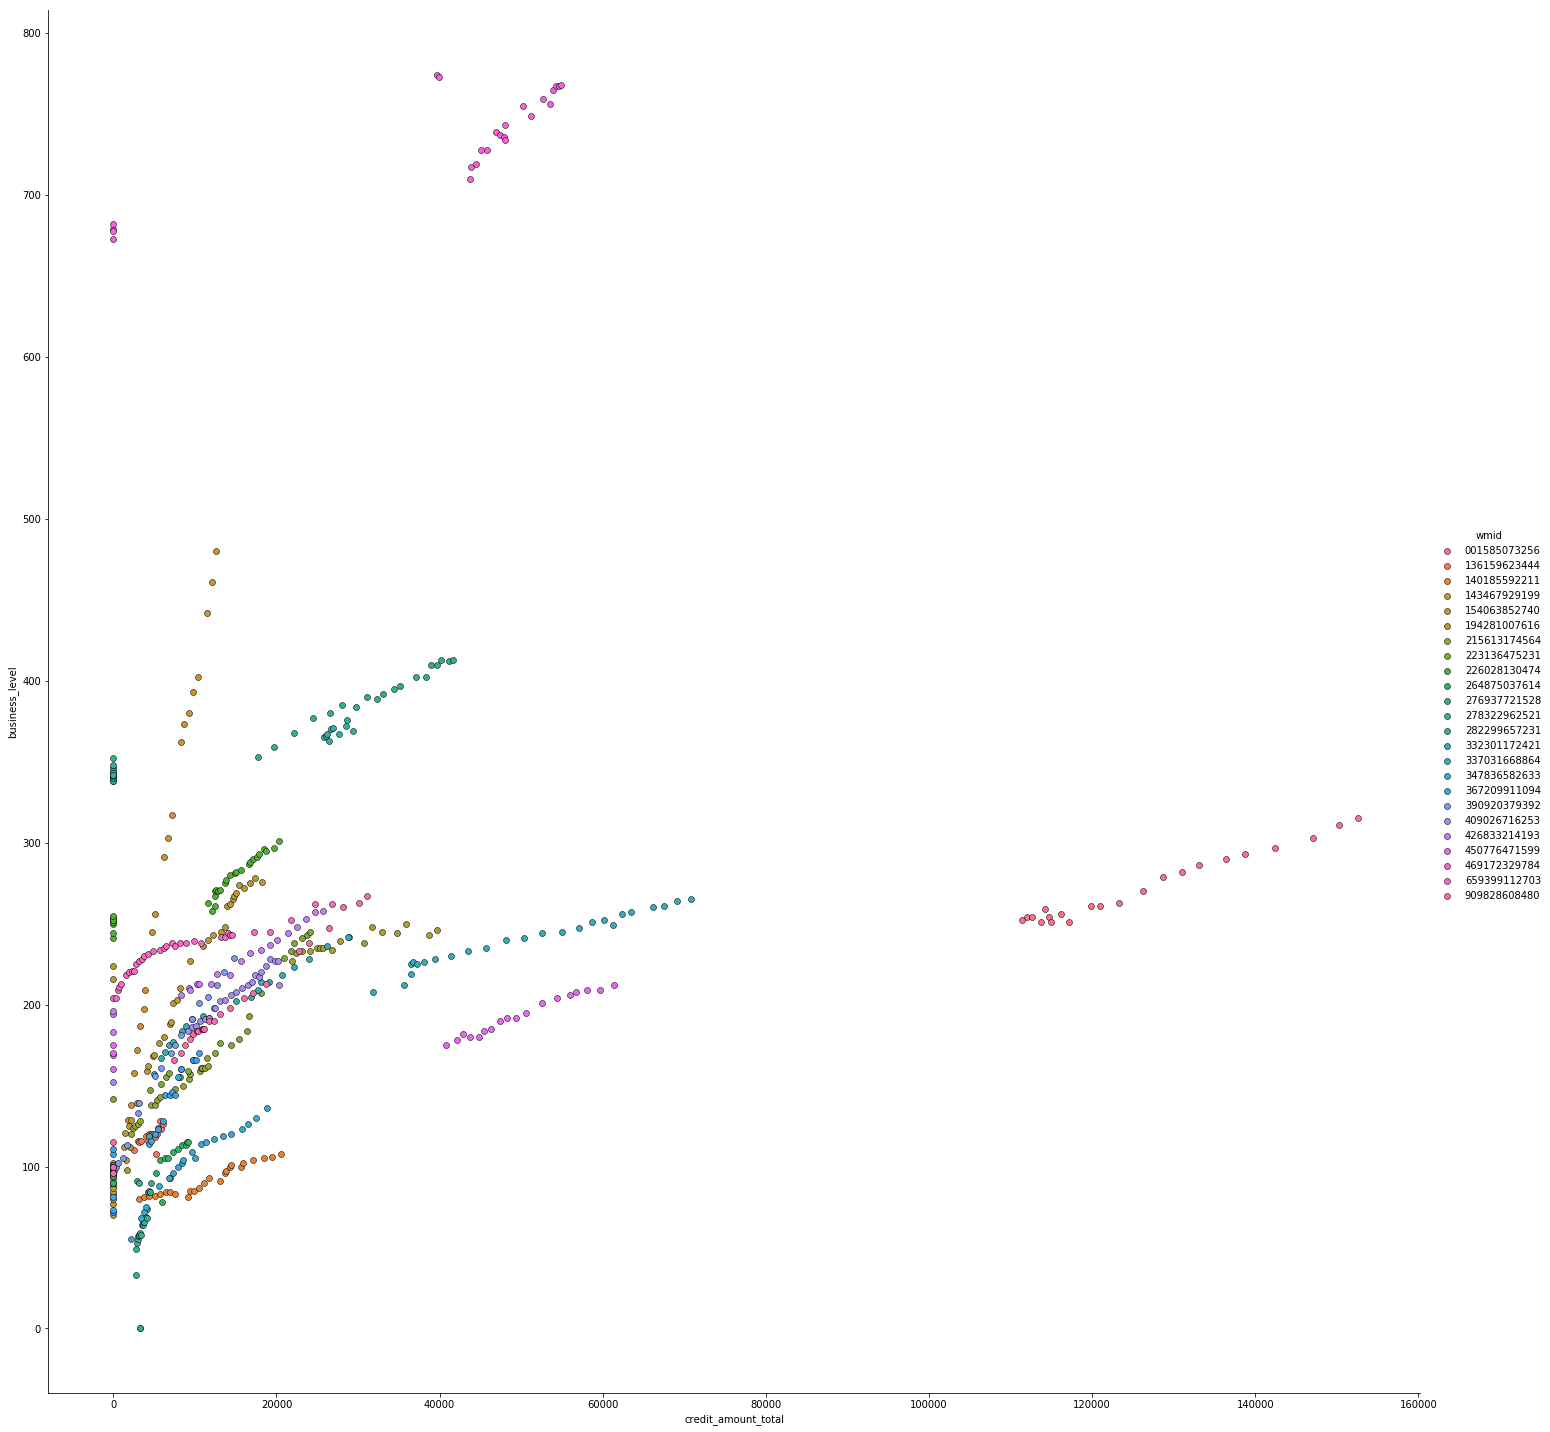

In [8]:
d = deals[deals['loan_count_total'] > 20]
# scatter(d['credit_amount_total'], d['business_level'], d['wmid'])
sns.pairplot(data=d, 
                  x_vars=["credit_amount_total"], 
                  y_vars=["business_level"], 
                  # size=4.5,
                  height=20,
                  hue="wmid", # <== 😀 Look here!
                  # palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))

In [9]:
# sns.jointplot(x='loan_count', y='delinq', data=deals, kind='scatter')

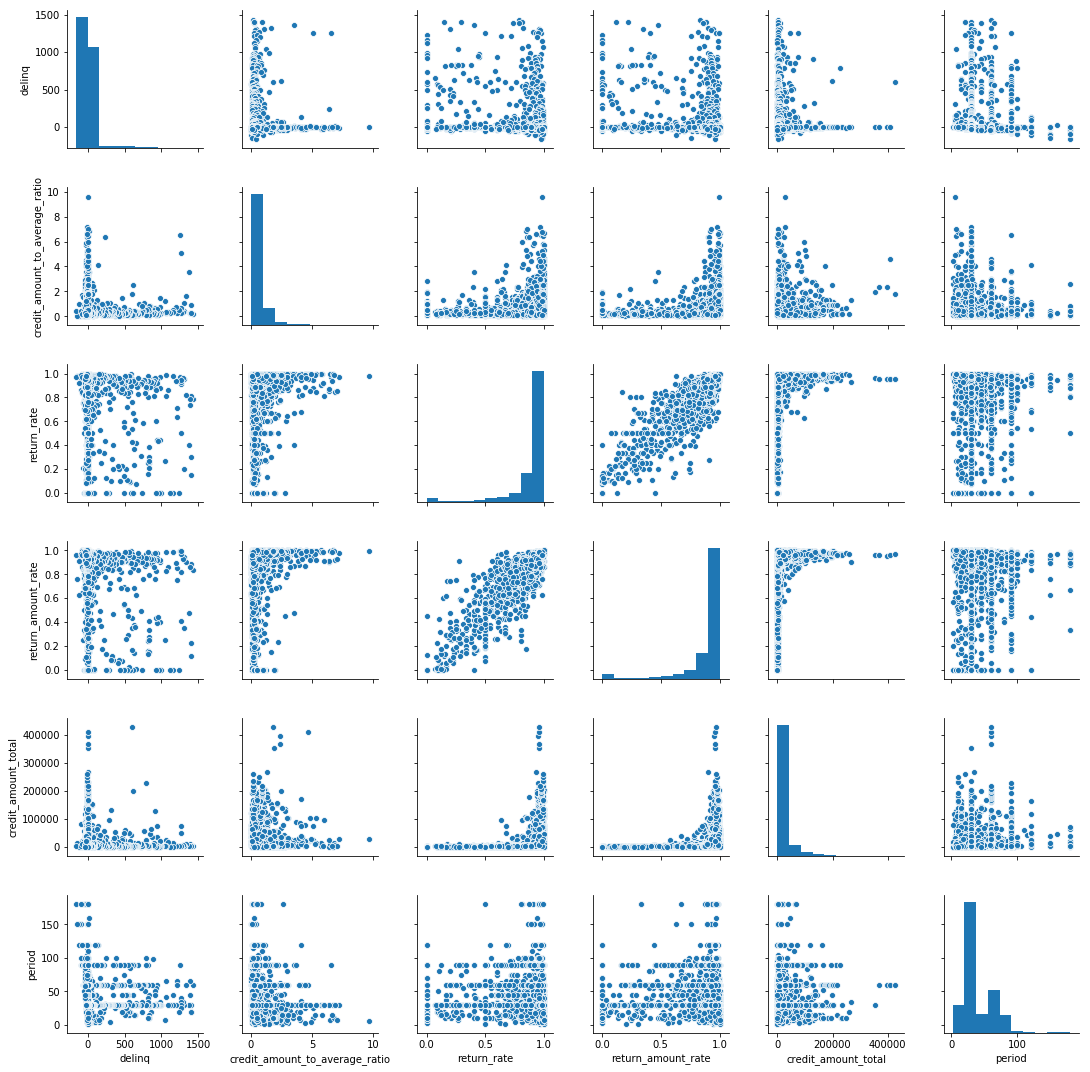

In [74]:
sns.pairplot(deals[deals['debt'] < 10][['delinq', 'credit_amount_to_average_ratio', 'return_rate', 'return_amount_rate', 'credit_amount_total', 'period']])


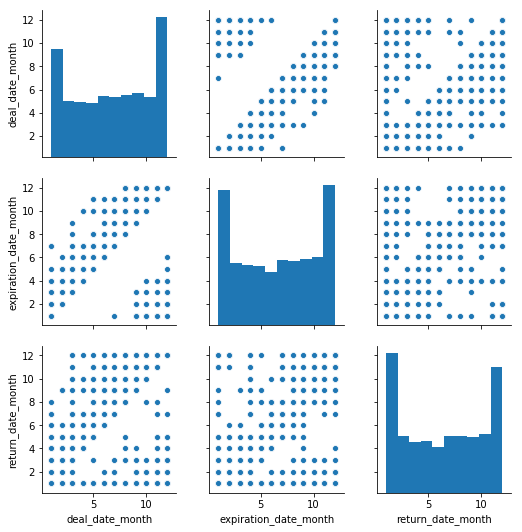

In [76]:
sns.pairplot(deals[deals['debt'] < 10][['deal_date_month', 'expiration_date_month', 'return_date_month']])

### Correllation matrix

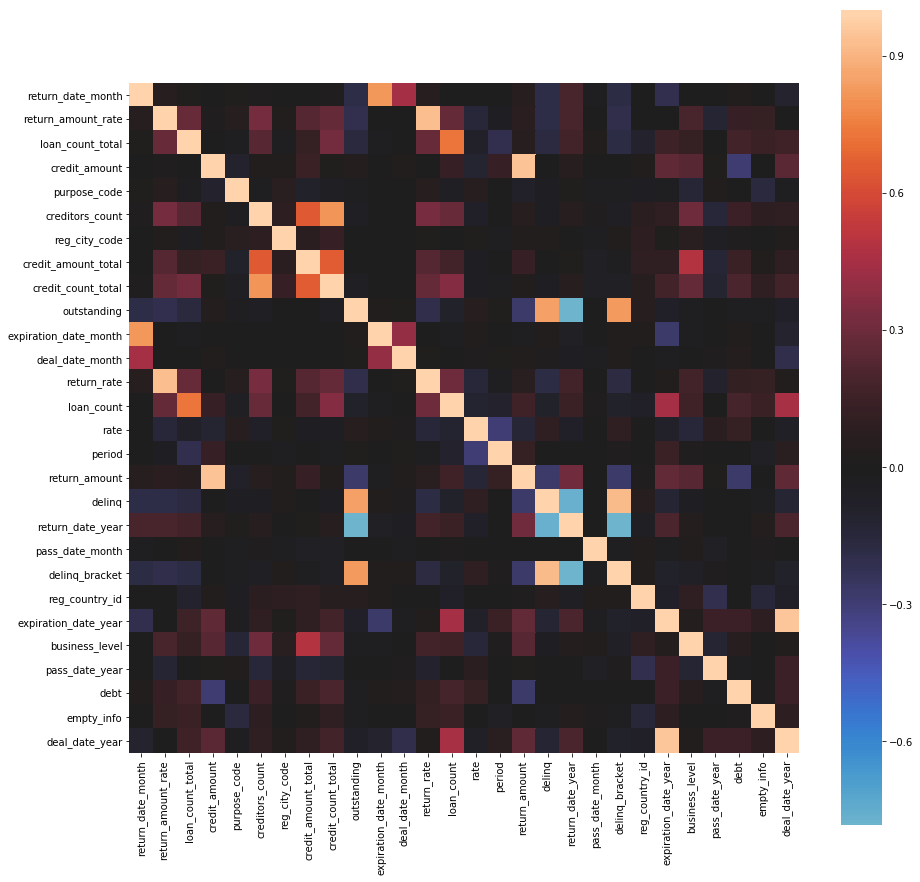

In [51]:
%config InlineBackend.figure_format = 'png'
plt.rcParams["figure.figsize"] = (15, 15)

corr_matrix = deals[feature_columns].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr_matrix, center=0, mask=mask, square=True);
sns.heatmap(corr_matrix, center=0, square=True);

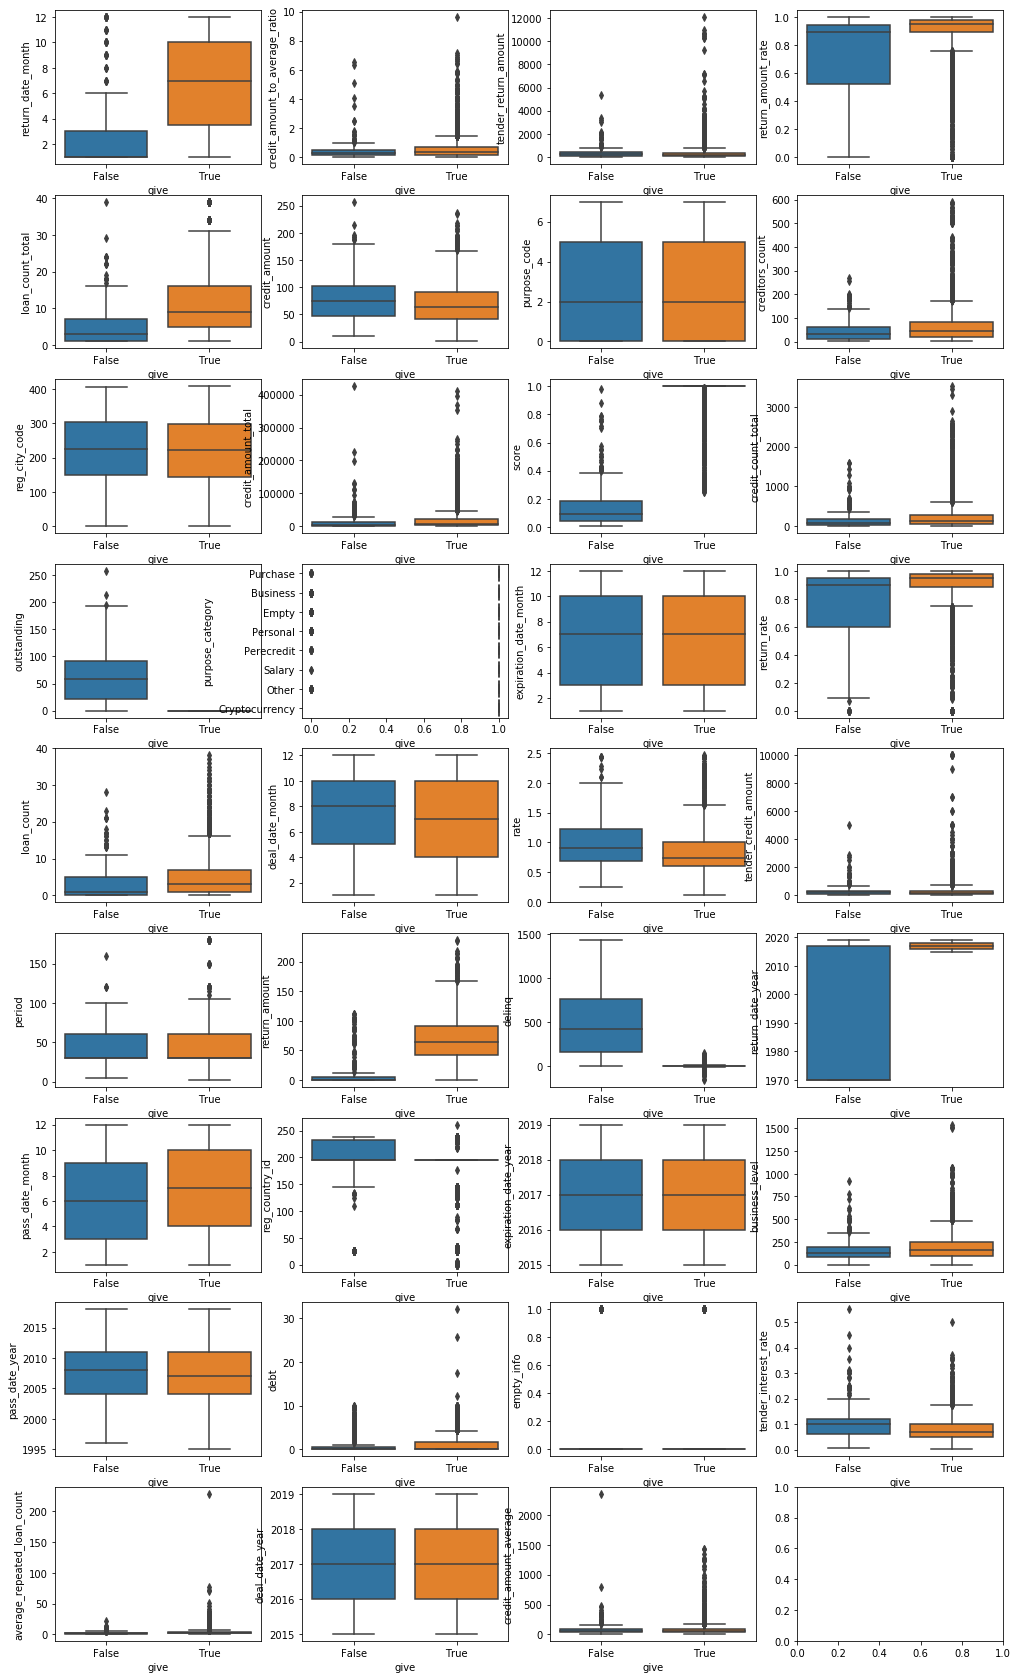

In [73]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(17, 30))

for idx, feat in enumerate(list(set(feature_columns) - set(['give', 'delinq_bracket']))):
    sns.boxplot(x='give', y=feat, data=deals, ax=axes[int(idx / 4), idx % 4])
    # axes[int(idx / 4), idx % 4].legend()
    # axes[int(idx / 4), idx % 4].set_xlabel('Delinq Bracket')
    # axes[int(idx / 4), idx % 4].set_ylabel(feat)

In [39]:
# sns.boxplot(x='delinq_bracket', y='deal_date_month', data=deals)

In [43]:
# sns.boxplot(x='delinq_bracket', y='reg_city_code', data=deals)

In [41]:
# sns.boxplot(x='delinq_bracket', y='credit_amount_total', data=deals[deals['credit_amount_total'] < 40000])